In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [ ]:
df=pd.read_csv("churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce')  #coerce will ignore the error in the string if any

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] #give the columns where totolcharges error is ingnored

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:


df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()] .shape

(11, 20)

In [ ]:
df.shape

(7043, 20)

In [ ]:
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [ ]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
pd.to_numeric(df1.TotalCharges)

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes

<ipython-input-14-4aacf71c3306>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


dtype('float64')

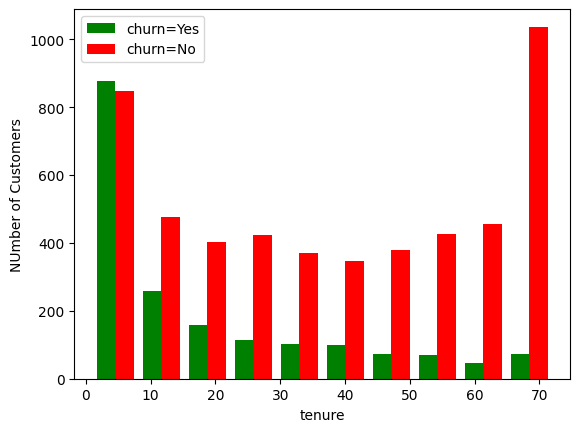

In [ ]:
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_yes=df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("NUmber of Customers")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

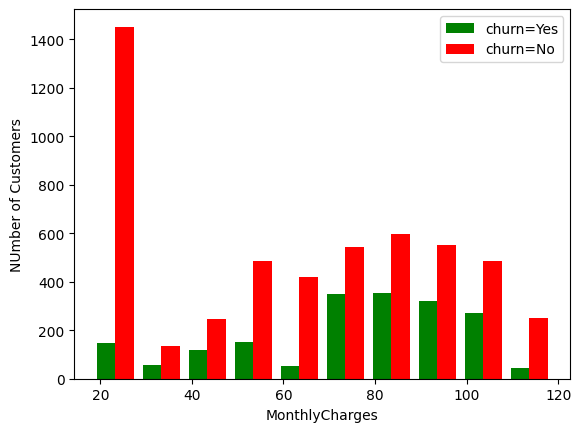

In [ ]:
MonthlyCharges_churn_no=df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("NUmber of Customers")
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],color=['green','red'],label=['churn=Yes','churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
 for column in df:
  if df[column].dtypes=='object':
    print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn:['No' 'Yes']


In [ ]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)



<ipython-input-19-69333f0e511a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
<ipython-input-19-69333f0e511a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df1.isnull().sum()


,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
yes_no_columns = [
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn'
]

for col in yes_no_columns:
  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)



<ipython-input-22-1147c9ebe644>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)
<ipython-input-22-1147c9ebe644>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1, 'No': 0},inplace=True)
<ipython-input-22-1147c9ebe644>:17

In [ ]:
print_unique_col_values(df1)


gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
df1['gender'].replace({'Female': 1, 'Male': 0},inplace=True)


<ipython-input-24-517cc3ad1762>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female': 1, 'Male': 0},inplace=True)
<ipython-input-24-517cc3ad1762>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female': 1, 'Male': 0},inplace=True)
<ipython-input-2

In [ ]:
print(df1['gender'].unique())


[1 0]


In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
# do one hot encoding here

In [ ]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
84,1,0,1,0,49,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False
2790,1,0,0,0,50,1,1,1,1,0,...,False,True,False,False,False,True,False,False,True,False
3510,1,0,0,0,8,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
5459,1,0,1,1,10,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
true_false_columns = ['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for col in true_false_columns:
    df2[col].replace({True : 1, False : 0}, inplace = True)

<ipython-input-29-250fde9b456d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2[col].replace({True : 1, False : 0}, inplace = True)
<ipython-input-29-250fde9b456d>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col].replace({True : 1, False : 0}, inplace = True)


In [ ]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3994,1,1,1,0,54,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
4916,1,0,0,0,2,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5714,1,0,1,1,4,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
6997,1,0,1,0,27,1,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df2.dtypes # every datatype converted to integers

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])
df2.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6804,0,0,1,1,0.056338,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
2562,0,0,1,1,0.915493,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
X=df2.drop('Churn',axis='columns')
Y=df2['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

In [ ]:
import tensorflow as tf
from tensorflow import keras



model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7251 - loss: 0.5490
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7871 - loss: 0.4345
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7889 - loss: 0.4291
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7908 - loss: 0.4268
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8079 - loss: 0.4015
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8096 - loss: 0.4080
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8053 - loss: 0.4101
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4156
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4013
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7998 - loss: 0.4160


In [ ]:
model.evaluate(X_test,Y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7905 - loss: 0.4345


[0.4427735209465027, 0.7853589057922363]

In [ ]:
yp=model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.20379649],
       [0.36372462],
       [0.00905843],
       [0.73601353],
       [0.4016998 ]], dtype=float32)

In [ ]:
Y_test[:5]

,Churn
2660,0
744,0
5579,1
64,1
3287,1


In [ ]:
Y_pred=[]
for element in yp:
  if element >0.5:
     Y_pred.append(1)
  else:
    Y_pred.append(0)


In [ ]:
Y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.52      0.59       408

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



tf.Tensor(
[[892 107]
 [195 213]], shape=(2, 2), dtype=int32)


Text(50.722222222222214, 0.5, 'Truth')

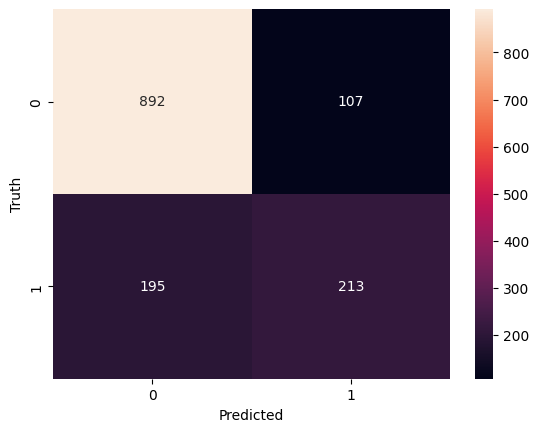

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_pred)
print(cm)

sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
def ANN(X_train, Y_train, X_test, Y_test, loss, weights):
    model=keras.Sequential([
          keras.layers.Dense(20,input_shape=(26,),activation='relu'),
          keras.layers.Dense(15,activation='relu'),
          keras.layers.Dense(1,activation='sigmoid')
    ])

    model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy']
    )

    if weights==-1:
        model.fit(X_train,Y_train,epochs=10)
    else:
        model.fit(X_train,Y_train, epochs=10,class_weight=weights)

    model.evaluate(X_test,Y_test)

    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print("Classification Report:  \n", classification_report(Y_test, y_preds))
    return y_preds

In [ ]:
y_preds=ANN(X_train, Y_train, X_test, Y_test,'binary_crossentropy',-1)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6844 - loss: 0.5987
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7930 - loss: 0.4346
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7987 - loss: 0.4217
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7937 - loss: 0.4331
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8125 - loss: 0.4017
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 0.4059
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8087 - loss: 0.4033
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8152 - loss: 0.3980
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8106 - loss: 0.4058
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8046 - loss: 0.4137
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8085 - loss: 0.4027
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

UNDERSAMPLING

In [ ]:
Y_test.value_counts()

,count
Churn,
0,999
1,408


In [ ]:
df1.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
count_class_0, count_class_1 = df1.Churn.value_counts()

df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_0.shape

(5163, 27)

In [ ]:
df_class_1.shape

(1869, 27)

In [ ]:
df_class_0.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
986,1,0,0,0,0.15493,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4408,1,0,1,1,1.00000,1,1,1,0,1,...,1,0,0,0,0,1,1,0,0,0


In [ ]:
df_class_0_under=df_class_0.sample(count_class_1)   #df_class_0" me se sirf utni hi random rows le lo jitni class 1 ke paas h taaki balance ho jaaye.
df_class_0_under.shape

(1869, 27)

In [ ]:
# Now, we need to combine these two dataframes
df_test_under=pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(3738, 27)

In [ ]:
print("Random under - sampling: ")
print(df_test_under.Churn.value_counts())

Random under - sampling: 
Churn
0    1869
1    1869
Name: count, dtype: int64


In [ ]:
# Now, we need to create X and y from this newly created dataframe
X = df_test_under.drop('Churn', axis = 'columns')
y = df_test_under['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)
# stratify ensures that the we have balanced samples.

In [ ]:
Y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [ ]:
Y_test.value_counts()

,count
Churn,
1,374
0,374


In [ ]:
y_preds = ANN(X_train,Y_train, X_test, Y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6375 - loss: 0.6215
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7728 - loss: 0.5025
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7701 - loss: 0.4776
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7801 - loss: 0.4701
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7708 - loss: 0.4718
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7848 - loss: 0.4551
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7782 - loss: 0.4679
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7909 - loss: 0.4528
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4525
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7862 - loss: 0.4494
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7350 - loss: 0.5296
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Classification Report:  
               precisi

**Method 2 - Oversampling**

In [ ]:
count_class_0, count_class_1

(5163, 1869)

In [ ]:
df_class_1.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6289,0,0,0,0,0.929577,1,1,1,1,1,...,0,1,0,0,0,1,0,1,0,0
3799,1,0,0,0,0.422535,1,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
df_class_1_over=df_class_1.sample(count_class_0,replace=True) # replace argument is used to duplicate the samples.
df_class_1_over.shape

(5163, 27)

In [ ]:
Y_train.value_counts()

,count
Churn,
0,1495
1,1495


In [ ]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis = 0)

print("Random Over - Sampling: ")
print(df_test_over.Churn.value_counts())

Random Over - Sampling: 
Churn
0    5163
1    5163
Name: count, dtype: int64


In [ ]:
X = df_test_over.drop('Churn', axis = 'columns')
y = df_test_over['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15, stratify = y)

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6747 - loss: 0.6087
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7679 - loss: 0.4903
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7630 - loss: 0.4826
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7710 - loss: 0.4713
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7640 - loss: 0.4771
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7644 - loss: 0.4738
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7701 - loss: 0.4714
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7795 - loss: 0.4625
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.4548
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7831 - loss: 0.4602
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7819 - loss: 0.4713
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:  
  

SMOTE(sythetic minority oversampling technique)

In [ ]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [ ]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')
X_sm,Y_sm=smote.fit_resample(X,Y)
Y_sm.value_counts()

,count
Churn,
0,5163
1,5163


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state = 15, stratify = Y_sm)

In [ ]:
y_train.value_counts()

,count
Churn,
1,4130
0,4130


In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6575 - loss: 0.6032
Epoch 2/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7709 - loss: 0.4779
Epoch 3/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7792 - loss: 0.4618
Epoch 4/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7786 - loss: 0.4561
Epoch 5/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.4373
Epoch 6/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7879 - loss: 0.4403
Epoch 7/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7907 - loss: 0.4413
Epoch 8/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7864 - loss: 0.4433
Epoch 9/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8037 - loss: 0.4303
Epoch 10/10
259/259 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7977 - loss: 0.4418
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7745 - loss: 0.4390
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:  
             

**Use of ensemble with undersampling**

In [ ]:
df2.Churn.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
X = df2.drop('Churn', axis = 'columns')
Y_sm = df2['Churn']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 15, stratify = Y)

In [ ]:
Y_train.value_counts()

,count
Churn,
0,4130
1,1495


In [ ]:
4130 / 1495 # as 2.7 ~ 3 , so we need to divide the majority class into 3 parts

2.762541806020067

In [ ]:
df3=X_train.copy()
df3['Churn']=Y_train

In [ ]:
# create a dataframe for training data
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
df3_class0.shape,  df3_class1.shape

((4130, 27), (1495, 27))

In [ ]:
def get_train_batch(df_majority,df_minority,start,end):
  df_train = pd.concat([df_majority[start:end],df_minority],axis=0)


  X_train = df_train.drop('Churn', axis = 'columns')
  Y_train = df_train['Churn']

  return X_train, Y_train

In [ ]:
X_train,Y_train=get_train_batch(df3_class0,df3_class1,0,1495)

X_train.shape,Y_train.shape

((2990, 26), (2990,))

In [ ]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)


X_train: (2990, 26)
Y_train: (2990,)
X_test: (1407, 26)
Y_test: (1407,)


In [ ]:
import pandas as pd
pd.Series(Y_train).value_counts()


,count
Churn,
0,1495
1,1495


In [ ]:
Y_pred1 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5949 - loss: 0.6617
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7489 - loss: 0.5513
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7842 - loss: 0.4900
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7544 - loss: 0.5002
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7529 - loss: 0.5071
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7836 - loss: 0.4633
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7606 - loss: 0.4939
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7625 - loss: 0.4852
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7726 - loss: 0.4749
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7712 - loss: 0.4688
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7610 - loss: 0.4781
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Classification Report:  
               precis

In [ ]:
X_train, Y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

Y_pred2 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5670 - loss: 0.6861
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7377 - loss: 0.5643
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7461 - loss: 0.5075
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7512 - loss: 0.5228
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5029
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7542 - loss: 0.4971
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7527 - loss: 0.4964
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7604 - loss: 0.4952
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.4936
Epoch 10/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7674 - loss: 0.4750
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7338 - loss: 0.5019
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:  
               precision    recal

In [ ]:
X_train, Y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

Y_pred3 = ANN(X_train, Y_train, X_test, Y_test, 'binary_crossentropy', -1)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6433 - loss: 0.6317
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7646 - loss: 0.5155
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7608 - loss: 0.4938
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7532 - loss: 0.5122
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7614 - loss: 0.4939
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7791 - loss: 0.4752
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7830 - loss: 0.4704
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7817 - loss: 0.4739
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.4666
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4681
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5347
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:  
               precision    recal

In [ ]:
vote1 = 0
vote2 = 0
vote3 = 1

vote1 + vote2 + vote3 # if sum > 1 , then majority vote is 1

1

In [ ]:
Y_pred_final=Y_pred1.copy()

for i in range(len(Y_pred1)):
  n_ones = Y_pred1[i]+Y_pred2[i]+Y_pred3[i]
  if n_ones>1:
     Y_pred_final[i]=1
  else:
       Y_pred_final[i]=0

In [ ]:
print(classification_report(Y_test, Y_pred_final))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.80      0.60       374

    accuracy                           0.72      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.72      0.73      1407

